# Supervised Learning

In this lab, you will build a simple text classifier to predict whether a movie review has positive or negative sentiment. You will learn to use a count-based bag-of-words model and logistic regression from `sklearn` library to do this.
We will use [IMDB movie review dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

# Download data
First, let's download the data. Run the following commands to download and unzip the data.



In [0]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xzf aclImdb_v1.tar.gz

--2020-01-29 19:09:54--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.3’

aclImdb_v1.tar.gz.3 100%[===================>]  80.23M  17.8MB/s    in 11s     

2020-01-29 19:10:05 (7.61 MB/s) - ‘aclImdb_v1.tar.gz.3’ saved [84125825/84125825]



The downloaded IMDB dataset should now be under `/content/` folder.

In [0]:
!ls /content/aclImdb/

imdbEr.txt  imdb.vocab	README	test  train


In [0]:
import os
import numpy as np

## Preprocess and load the data

Here, we will load the data and preprocess it. We will extract features from our data and transform the features into vector (or matrix) form.

In [0]:
def preprocess_text(text):
    """
    Function that preprocesses the string
    """
    preprocessed_text = text.lower().replace("<br />", "")
    return preprocessed_text
        
    
def read_file(file_name, label):
    """
    Function that reads a file 
    and return the raw text, preprocessed text, and label
    """
    with open(file_name, "r") as f:
        raw_text = f.read()
        preprocessed_text = preprocess_text(raw_text)
    return raw_text, preprocessed_text, label

def construct_dataset(dataset_dir):
    """
    Function that loads a dataset
    @param offset: skip first offset items in this dir
    """
    pos_dir = os.path.join(dataset_dir, "pos")
    neg_dir = os.path.join(dataset_dir, "neg")
    dir_list = [neg_dir, pos_dir]
    raw_contents, contents, labels = [], [], []
    all_pos = os.listdir(pos_dir)
    all_neg = os.listdir(neg_dir)
    data_size = len(all_neg)
    for i in range(data_size):
        for lbl, dataset in enumerate([all_neg, all_pos]):
          raw_content, content, label = read_file(os.path.join(dir_list[lbl], dataset[i]), lbl)
          contents.append(content)
          raw_contents.append(raw_content)
          labels.append(label)

    return raw_contents, contents, labels

In [0]:
path = "/content/aclImdb/"
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")
sentiments = ["Negative", "Positive"]

The dataset is already split into trainin and test set.
However, we should not touch the test data during initial model hyperparameter tuning and model selection stage. 
Let's split the given train data into training set and validation set.

In [0]:
test_raw_contents, test_contents, test_labels = construct_dataset(test_dir)
raw_contents, contents, labels = construct_dataset(train_dir)

train_split = int(len(raw_contents)*0.8)
train_raw_contents, train_contents, train_labels = raw_contents[:train_split], contents[:train_split], labels[:train_split]
val_raw_contents, val_contents, val_labels = raw_contents[train_split:], contents[train_split:], labels[train_split:]
# TODO: split data from train_dir into train, and validation set
# train_raw_contents, train_contents, train_labels = ?
# val_raw_contents, val_contents, val_labels = ?

In [0]:
print("Review: ", train_raw_contents[0])
print("Sentiment: ", sentiments[train_labels[0]])

Review:  I think that if I went to a first school somewhere deep in the countryside and asked the bottom set of English to come up with a script, it would make more sense than this. I could then go to the first year drama group and they would act it out better than the jokers in this film. This sounds really mean, but I'm certain that they made this as a joke and are entirely aware that they possess (see what I did there?) neither the skills to act or to write anything, ever.<br /><br />Watch this only if you're incredibly drunk, high or in need of a good excuse as to why your decaying corpse was found with slit wrists. I will now go to my fish bowl and collect all of the poo at the bottom. After that, I will mould it into the shape of a disc and put it into my DVD player, fully expecting it to produce something far better than this trumpery.<br /><br />Acting - 0/10 Plot - LOL/10 Breasts - 9/10
Sentiment:  Negative


# Bag of words
Our training data is in text format, but for feeding it as input to a machine learning model, we need to transform the text into numbers.

To do this is to represent each example in the data as a vector of word counts.

For example:  
X = ['NLP is fun', 'NYU is fun'] 

features = ['NLP', 'is', 'fun', 'NYU']  

Vectorized_X:  
[ [1 1 1 0]   
  [0 1 1 1 ]  ]



Using `sklearn.feature_extraction.text.CountVectorizer`, we will construct a `CountVectorizer` class that extract features from training data using the most frequent words in the training data.

We will then transform the text data into BoW vector representations using the `transform` function of the `CountVectorizer` --- each row of the input matrix (vector) corresponds to an example in the dataset, each column corresponds to a word, and each entry corresponds to the number of times that word appears in the corresponding example.


In [0]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# TODO: YOUR CODE HERE
vectorizer = CountVectorizer(max_features=2000)
vectorizer.fit(train_contents)
X_train = vectorizer.transform(train_contents)
X_val = vectorizer.transform(val_contents)
X_test = vectorizer.transform(test_contents)

y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)
vocab = vectorizer.get_feature_names()


# Logistic Regression

Now, we will train a logistic regression classifier on our data. 


In [0]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
model = LogisticRegression(random_state=0, solver='liblinear')

# Fit the model to training data
model.fit(X_train, y_train)

# make prediction using the trained model
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

Report the accuracy of the model on training and validation set.  
Hint: `sklearn.metrics.accuracy_score`

In [0]:
# TODO: YOUR CODE HERE
from sklearn.metrics import f1_score, accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training accuracy:", train_accuracy)
print("Validation accuracy:", val_accuracy) 

Training accuracy: 0.91555
Validation accuracy: 0.8608


Let's check prediction of the model on a random example in validation set.

In [0]:
import random
j = random.randint(0,len(y_val))
print("True label: ", sentiments[y_val[j]])
print("Prediction: " , sentiments[y_val_pred[j]])
print(val_raw_contents[j].strip())

True label:  Negative
Prediction:  Negative
I watched this movie with some friends a couple months ago, I still laugh today thinking about some of the utter stupidity. The first few scenes alone were hilarious. I won't spoil anything for those who wish to see it, I wouldn't want to ruin the laughs. Needless to say the entire time I watched this movie I was trying to figure out exactly what the point of anything the characters in this movie were doing. Towards the end we all got bored however, as the initial hilarity and shock of a movie being this random wore off. There is no plot and not a trace of decent acting. The characters are about as well developed as those in a kindergarten "Learn to Read" book. They even managed to make a lesbian sex scene uninteresting.


Finally, we can check the coefficients, or learned weights, of each word feature to understand which features are generally associated with positive or negative sentiment.

In [0]:
coefficients = model.coef_[0]
indices = np.argsort(coefficients) 
# Most negatively weighted
print("Words associated with negative sentiment")
for i in indices[:10]:
  print(vocab[i], coefficients[i])
print()
# Most positively weighted
print("Words associated with positive sentiment")
for i in indices[-10:]: 
  print(vocab[i], coefficients[i])

Words associated with negative sentiment
lacks -2.0587767931179948
waste -2.052424996665995
disappointment -1.8084120461958595
poorly -1.7103607133343526
unfunny -1.6936273030999842
worst -1.6671484699776637
redeeming -1.466246995576819
screaming -1.4534840081399665
pointless -1.383302225300053
awful -1.3802133553759586

Words associated with positive sentiment
friendship 1.0489939050741481
delightful 1.0805529952476736
innocent 1.0806707041479653
excellent 1.0964168048556582
rare 1.1768397751707411
perfect 1.1878206235898112
subtle 1.2792224945470911
funniest 1.4502362508536792
surprisingly 1.4818219877439873
wonderfully 1.7674122824297744


### How performance depends on size of train data? Learning curve.

Let's explore how train, val performance changes depending on how much data the model uses for training.

Your task is to train the model on train subsets of different sizes (randomly pick `n` reviews from train), calculate train and val accuracies in each case and plot the results (with train size on x axis, accuracy on y axis) -- there will be two curves, for train and for val. This graph is called Learning curve.

In [0]:
train_sizes = np.arange(1000, len(y_train), 1000)
scores_train = []
scores_val = []

for train_size in train_sizes:
    """
    TODO: YOUR CODE GOES HERE
    """
    idces = np.random.randint(len(y_train), size=train_size)
    X_train_subset = X_train[idces, :]
    y_train_subset = y_train[idces]
    # Define Logistic Regression model
    model = LogisticRegression(random_state=0, solver='liblinear')

    # Fit the model to training data
    model.fit(X_train_subset, y_train_subset)

    # Make prediction using the trained model
    y_train_subset_pred = model.predict(X_train_subset)
    y_val_pred = model.predict(X_val)

    scores_train.append(accuracy_score(y_train_subset, y_train_subset_pred))
    scores_val.append(accuracy_score(y_val, y_val_pred))

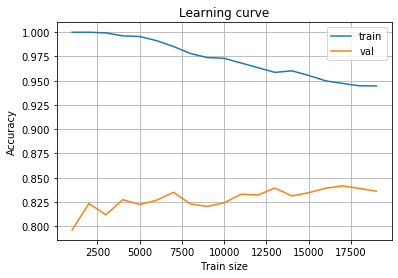

In [0]:
import matplotlib.pyplot as plt

plt.plot(train_sizes, scores_train, label="train")
plt.plot(train_sizes, scores_val, label="val")
plt.title("Learning curve")
plt.xlabel("Train size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Hyperparameter Tuning & Model Selection
There are hyperparameters -- the model configuration whose value is set before learning process -- associated with each model design. 
For example, in `vectorizer = CountVectorizer(max_features=2000)`, `max_features=2000` is a hyperparameter.

We train the models with different hyperparameters and select the model that has the best validation performance as the best model. And, we report the performance of that best model on the test data as our final test score. 
(You should **never** use test data for hyperparameter tuning and model selection).

Now, try tuning the hyperparameters of the model using validation set and report the test accuracy of the best model!


### How performance depends on the number of features?  
Similar to the previous section, explore how val performance changes depending on different sizes of `max_features`.

In [0]:
max_feature_sizes = np.arange(100, 2000, 200)
scores_train = []
scores_val = []

for max_feature in max_feature_sizes:
    """
    TODO: YOUR CODE GOES HERE
    """
    vect = CountVectorizer(max_features=max_feature)
    vect.fit(train_contents)
    X_train_vect  = vectorizer.transform(train_contents)
    X_val_vect = vectorizer.transform(val_contents)
    
    # Define Logistic Regression model
    model = LogisticRegression(random_state=0, solver='liblinear')

    # Fit the model to training data
    model.fit(X_train_vect, y_train)

    # Make prediction using the trained model
    y_train_pred = model.predict(X_train_vect)
    y_val_pred = model.predict(X_val_vect)

    scores_train.append(accuracy_score(y_train_subset, y_train_subset_pred))
    scores_val.append(accuracy_score(y_val, y_val_pred))

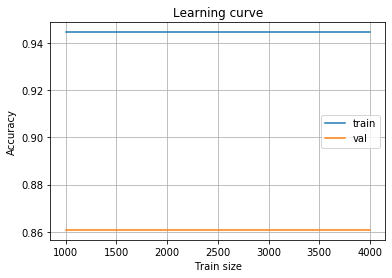

In [0]:
plt.plot(max_feature_sizes, scores_train, label="train")
plt.plot(max_feature_sizes, scores_val, label="val")
plt.title("Learning curve")
plt.xlabel("Train size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()